In [1]:
!pip install mlxtend

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
# import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
diabetes_df = pd.read_csv(r"C:\Users\Hp\Desktop\diabetes\diabetes_prediction_dataset.csv") 
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
diabetes_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [5]:
diabetes_df['gender'] = diabetes_df['gender'].map({
    'Male': 1,
    'Female': 2
    
})

diabetes_df['smoking_history'] = diabetes_df['smoking_history'].map({
    'never': 0,
    'No Info': 1,
    'current': 2,
    'former': 3,
    'ever': 4,
    'not current': 5
})

In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               99982 non-null   float64
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 6.9 MB


In [7]:
diabetes_df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.585625,41.885856,0.07485,0.039420,1.306950,27.320767,5.527507,138.058060,0.085000
std,0.492616,22.516840,0.26315,0.194593,1.454501,6.636783,1.070672,40.708136,0.278883
min,1.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,1.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2.000000,43.000000,0.00000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,2.000000,60.000000,0.00000,0.000000,2.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,99982.0,1.585625,0.492616,1.00,1.00,2.00,2.00,2.00
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
smoking_history,100000.0,1.306950,1.454501,0.00,0.00,1.00,2.00,5.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [9]:
diabetes_df.isnull().head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [10]:
diabetes_df.isnull().sum()

gender                 18
age                     0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
HbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

In [11]:
diabetes_df_copy = diabetes_df.copy(deep=True)
diabetes_df_copy[['gender','hypertension', 'heart_disease', 'smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level']] = diabetes_df_copy[['gender','hypertension', 'heart_disease', 'smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level']].replace(0, np.NaN)

# Showing the count of NaNs
print(diabetes_df_copy.isnull().sum())

gender                    18
age                        0
hypertension           92515
heart_disease          96058
smoking_history        35095
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64


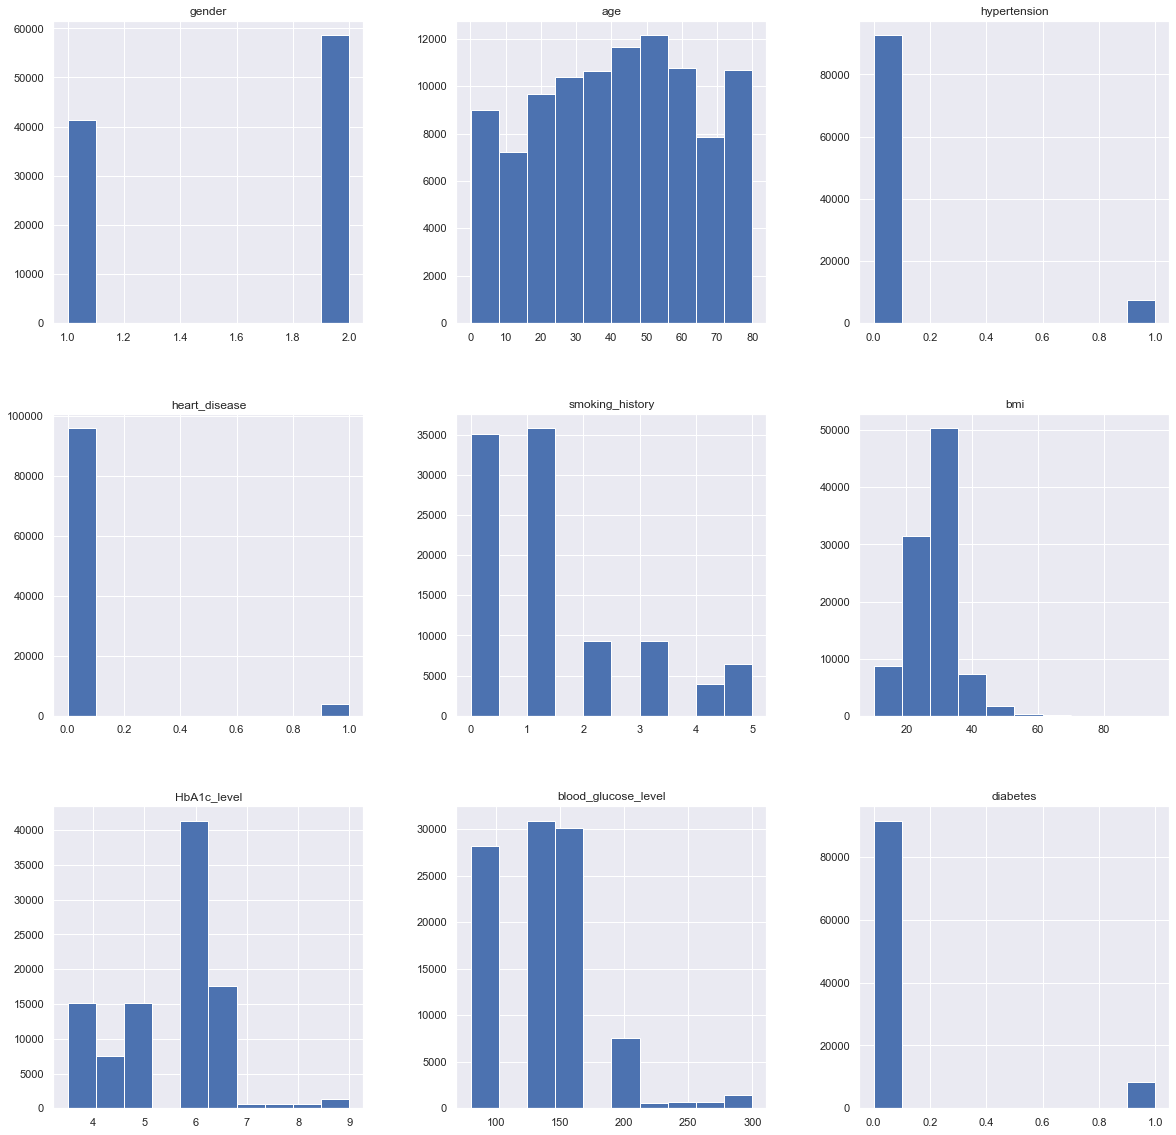

In [12]:
p = diabetes_df.hist(figsize=(20, 20))

In [13]:
#'gender', 'age', 'hypertension', 'heart_disease', 'smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes

diabetes_df_copy['gender'].fillna(diabetes_df_copy['gender'].mean(), inplace=True)
diabetes_df_copy['hypertension'].fillna(diabetes_df_copy['hypertension'].mean(), inplace=True)
diabetes_df_copy['heart_disease'].fillna(diabetes_df_copy['heart_disease'].mean(), inplace=True)
diabetes_df_copy['smoking_history'].fillna(diabetes_df_copy['smoking_history'].mean(), inplace=True)
diabetes_df_copy['bmi'].fillna(diabetes_df_copy['bmi'].median(), inplace=True)
diabetes_df_copy['HbA1c_level'].fillna(diabetes_df_copy['HbA1c_level'].median(), inplace=True)
diabetes_df_copy['blood_glucose_level'].fillna(diabetes_df_copy['blood_glucose_level'].median(), inplace=True)

In [14]:
#'gender', 'age', 'hypertension', 'heart_disease', 'smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes

diabetes_df['gender'].fillna(diabetes_df_copy['gender'].mean(), inplace=True)
diabetes_df['hypertension'].fillna(diabetes_df_copy['hypertension'].mean(), inplace=True)
diabetes_df['heart_disease'].fillna(diabetes_df_copy['heart_disease'].mean(), inplace=True)
diabetes_df['smoking_history'].fillna(diabetes_df_copy['smoking_history'].mean(), inplace=True)
diabetes_df['bmi'].fillna(diabetes_df_copy['bmi'].median(), inplace=True)
diabetes_df['HbA1c_level'].fillna(diabetes_df_copy['HbA1c_level'].median(), inplace=True)
diabetes_df['blood_glucose_level'].fillna(diabetes_df_copy['blood_glucose_level'].median(), inplace=True)

In [15]:
# p = msno.bar(diabetes_df)

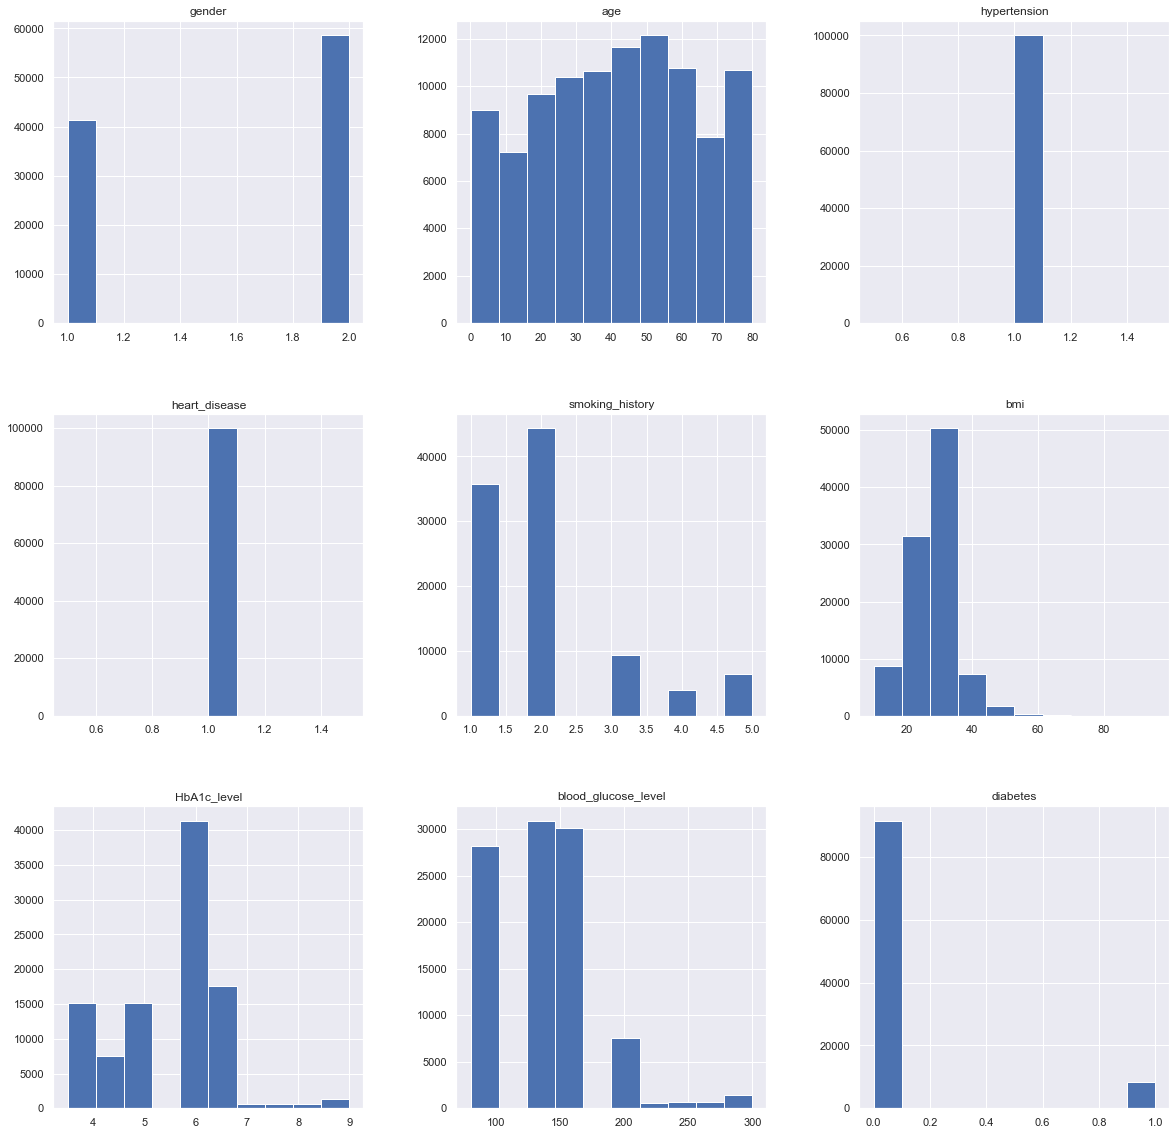

In [16]:
p = diabetes_df_copy.hist(figsize=(20, 20))

0    91500
1     8500
Name: diabetes, dtype: int64


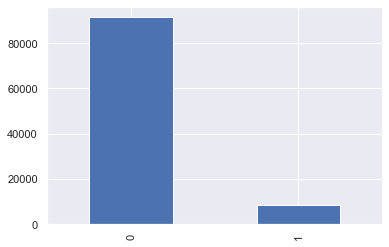

In [17]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["diabetes"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.diabetes.value_counts())
p = diabetes_df.diabetes.value_counts().plot(kind="bar")

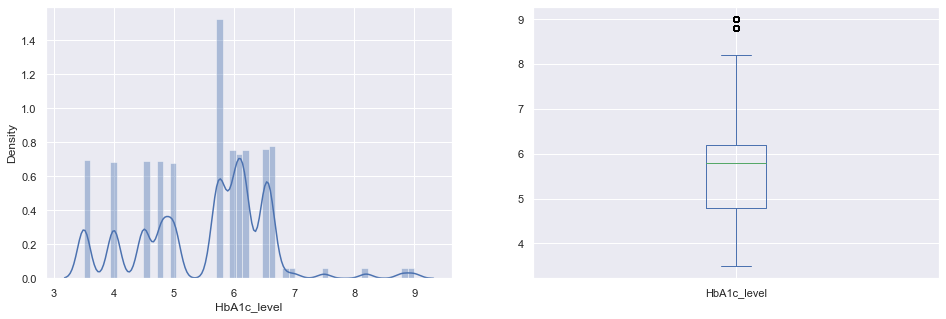

In [18]:
plt.subplot(121)
sns.distplot(diabetes_df['HbA1c_level'])
plt.subplot(122)
diabetes_df['HbA1c_level'].plot.box(figsize=(16, 5))
plt.show()

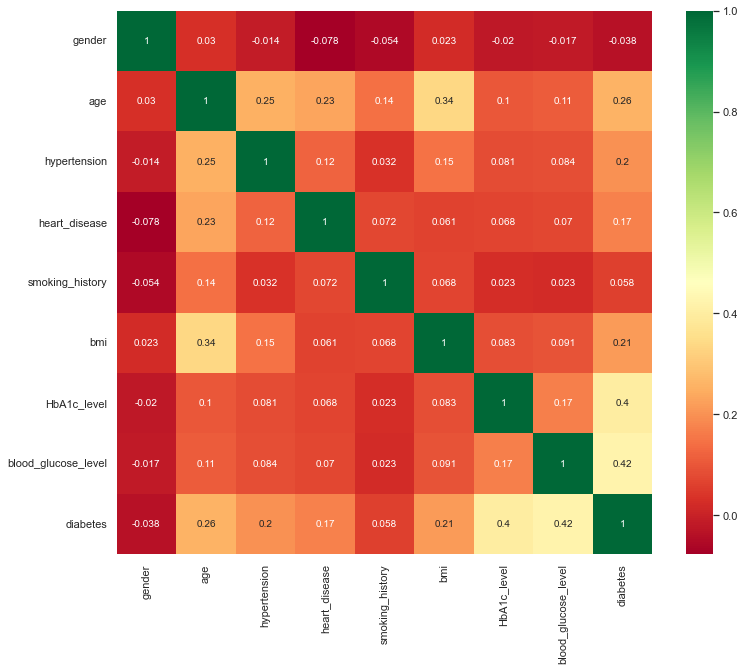

In [19]:
plt.figure(figsize=(12, 10))
# Using seaborn to create a heatmap for the correlation matrix
p = sns.heatmap(diabetes_df.corr(), annot=True, cmap='RdYlGn')

In [20]:
diabetes_df_copy.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,2.0,80.0,1.0,1.0,2.013635,25.19,6.6,140,0
1,2.0,54.0,1.0,1.0,1.000000,27.32,6.6,80,0
2,1.0,28.0,1.0,1.0,2.013635,27.32,5.7,158,0
3,2.0,36.0,1.0,1.0,2.000000,23.45,5.0,155,0
4,1.0,76.0,1.0,1.0,2.000000,20.14,4.8,155,0


In [21]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(['diabetes'], axis=1)), 

columns=['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level'])

X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0.841251,1.692704,0.0,0.0,-4.067629e-16,-0.321056,1.001706,0.047704
1,0.841251,0.538006,0.0,0.0,-9.284378e-01,-0.000116,1.001706,-1.426210
2,-1.188920,-0.616691,0.0,0.0,-4.067629e-16,-0.000116,0.161108,0.489878
3,0.841251,-0.261399,0.0,0.0,-1.248925e-02,-0.583232,-0.492690,0.416183
4,-1.188920,1.515058,0.0,0.0,-1.248925e-02,-1.081970,-0.679490,0.416183


In [22]:
y = diabetes_df_copy.diabetes
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [23]:
X = diabetes_df.drop('diabetes', axis=1)
y = diabetes_df['diabetes']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)
# X_train

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [26]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics
print("Training Accuracy =", format(metrics.accuracy_score(y_train, rfc_train)))

Training Accuracy = 0.9993731343283582


In [27]:
predictions = rfc.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, predictions)))

Test Accuracy = 0.9695151515151516


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[30105    95]
 [  911  1889]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     30200
           1       0.95      0.67      0.79      2800

    accuracy                           0.97     33000
   macro avg       0.96      0.84      0.89     33000
weighted avg       0.97      0.97      0.97     33000



In [29]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
dtree_train = dtree.predict(X_train)
from sklearn import metrics
print("Training Accuracy =", format(metrics.accuracy_score(y_train, dtree_train)))

Training Accuracy = 0.9993731343283582


In [31]:
predictions_dtree = dtree.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, predictions_dtree)))

Test Accuracy = 0.9512727272727273


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[30105    95]
 [  911  1889]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     30200
           1       0.95      0.67      0.79      2800

    accuracy                           0.97     33000
   macro avg       0.96      0.84      0.89     33000
weighted avg       0.97      0.97      0.97     33000



In [33]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [34]:
svc_pred = svc_model.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, svc_pred)))

Test Accuracy = 0.9466666666666667


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))


[[30200     0]
 [ 1760  1040]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     30200
           1       1.00      0.37      0.54      2800

    accuracy                           0.95     33000
   macro avg       0.97      0.69      0.76     33000
weighted avg       0.95      0.95      0.94     33000



In [36]:
rfc.feature_importances_

array([0.00742966, 0.09912162, 0.01454574, 0.00966942, 0.02410667,
       0.11965126, 0.3969884 , 0.32848723])

<AxesSubplot:>

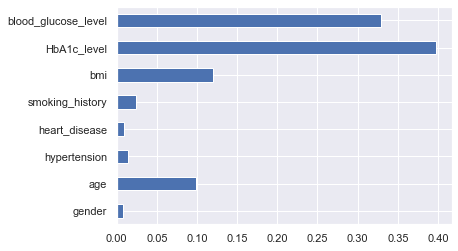

In [37]:
pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh')

In [38]:
import pickle 

# Firstly, we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc) 

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model) 

# Lastly, after loading that model we will use this to make predictions 
rfc_from_pickle.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,2.0,80.0,0,1,0,25.19,6.6,140,0
1,2.0,54.0,0,0,1,27.32,6.6,80,0
2,1.0,28.0,0,0,0,27.32,5.7,158,0
3,2.0,36.0,0,0,2,23.45,5.0,155,0
4,1.0,76.0,1,1,2,20.14,4.8,155,0


In [40]:
diabetes_df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,2.0,80.0,0,0,1,27.32,6.2,90,0
99996,2.0,2.0,0,0,1,17.37,6.5,100,0
99997,1.0,66.0,0,0,3,27.83,5.7,155,0
99998,2.0,24.0,0,0,0,35.42,4.0,100,0
99999,2.0,57.0,0,0,2,22.43,6.6,90,0


In [41]:
rfc.predict([[0, 137, 40, 35, 168, 43.1, 2.228, 33]]) # 4th patient

array([0], dtype=int64)